## Assignment - A4.part2
### Devin Hall, Tyler Birnie
### Due: 4-3-22 @ 11:59pm
Some pre-requisites we will need for this project

In [64]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


### Question 1: NBA Data

#### Question 1A: 
Load the data of NAB plays in the 2018-2019 season.
First, filter the players to only consider those who have played in more than 20 games. The analysis will ignore the first 7 columns as well as ignore the columns of statistics of prefectages (FG%, 3P%, 2P%,eFG%,FT%)

In [188]:
nba_df = pd.read_csv ('nba18-19.csv')
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


#### Question 1B:
The features have different ranges, therefore we should scale the date before considering the clustering analysis. Scal the data using min-max normalization with range of [0,1]

Python- MinMaxScaler from sklearn.preprocessing

#### Question 1C:
Run Kmeans clustering on the data with k=2, ..., 10. For each value of k, keep track of the within-cluster variation. This quantity is referred to as different terms such as "inertia" and total "within-cluster sum-of-squares"

Python - KMeans from sklearn.cluster.

Plot the within-cluster variation vs the values of k.
As discussed the value is alwasys decresasing, therefore it is difficult to use for selecting the _best_ value of k.

#### Question 1D:
Determine the "best" number of clusters using gap statistic. 
Python- gapstat.py available on Canvas with B1=50.

#### Question 1E: 
Create a data frame with the mean skill values (centers) of each group, using the best number of groups determined in (d), as a table or data frame. 

You may want to run Kmeans again with the best value of k.

Print out the statistics for each group (rows) and columns of "MP',"FG","3P", and "FT".

#### Question 1F:
Report the same statistics as in (e), but using the original data scaling (reverse the scalling back to the original data range).

#### Question 1G:
Apply PCA to the filtered nba data (make sure to apply the necessary scaling for running PCA). Plot the data in the first two principal components, coloed by the best group lables found in (e).

### Question 2: Music Data

For this problem you will consider several properties that have been measured from music recording.

#### Question 2A: 
load the data from music2.csv. Consider only the numeric variables from the data in music2.csv

In [187]:
#load music2.csv
df = pd.read_csv('music2.csv')

#make a copy for later
df2 = df

#drop columns not interested in
df_filter = df.drop(columns=['Song','Artist','Type'])

df_filter.head()

,LVar,LAve,LMax,LFEner,LFreq
0,17600755.6,-90.006867,29921,105.92095,59.57379
1,9543020.9,-75.766719,27626,102.83616,58.48031
2,9049481.5,-98.062924,26372,102.32488,124.59397
3,7557437.3,-90.471062,28898,101.61648,48.76513
4,6282285.6,-88.952631,27940,100.30076,74.02039


#### Questin 2B:
Standardize the variables

In [174]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = df_filter
target = df2.drop(columns=['Song','LVar','LAve','LMax','LFEner','LFreq'])
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
#print(scaled_data)
#print(target)

#### Quesiton 2C:
Perform hierachial clustering with single,complete,average linkage

In [175]:
#create linkage for single, complete, average
s_link = linkage(scaled_data, method='single')
c_link = linkage(scaled_data, method='complete')
a_link = linkage(scaled_data, method='average')

#### Question 2D:
Report out the results in a dendrogram. Label the clusters by "Type" of music

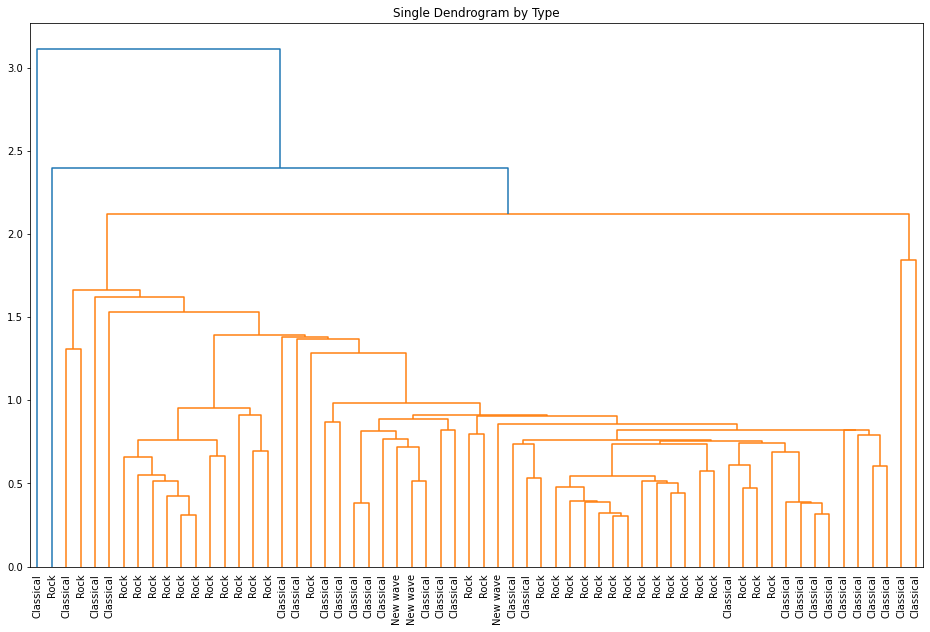

In [176]:
#set target index to "Type"
df=target.set_index('Type')

#plot 1D dendrogram single linkage by type
plt.figure(figsize=(16, 10))  
plt.title("Single Dendrogram by Type")  
S=dendrogram(s_link,labels=df.index,leaf_font_size=10)

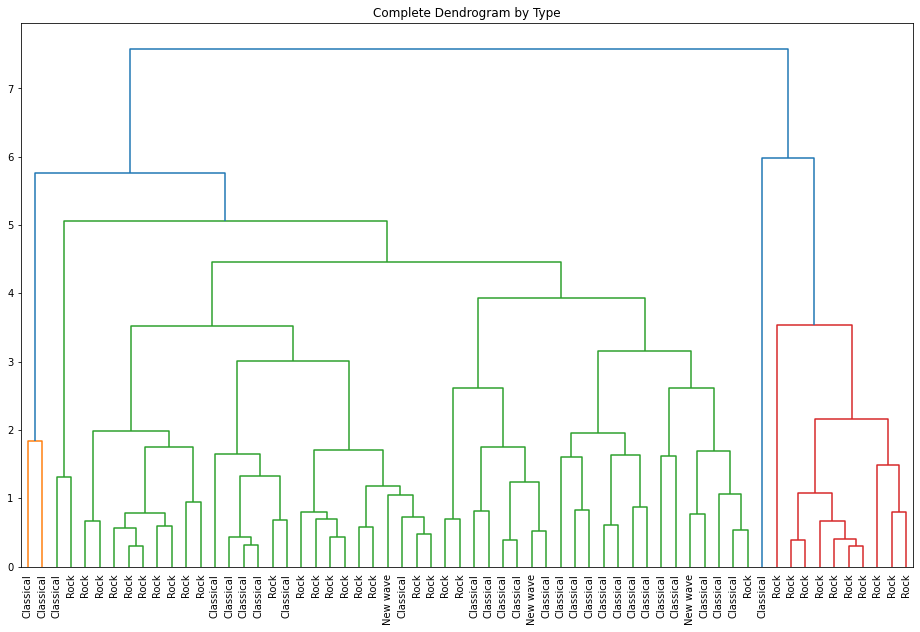

In [177]:
#plot 2D dendrogram complete linakge by type
plt.figure(figsize=(16, 10))  
plt.title("Complete Dendrogram by Type")  
C=dendrogram(c_link,labels=df.index,leaf_font_size=10)

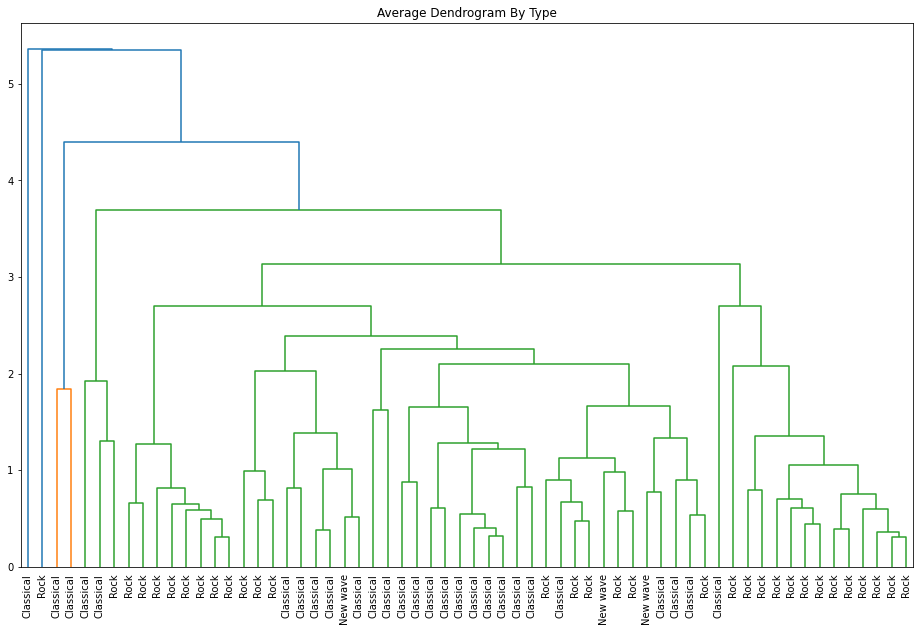

In [178]:
#plot 3D dendrogram average linkage by type
plt.figure(figsize=(16, 10))  
plt.title("Average Dendrogram By Type")  
A=dendrogram(a_link, labels=df.index, leaf_font_size=10)

#### Question 2E:
Report out the results of the dendrogram, but label the samples by the musical "Artist"

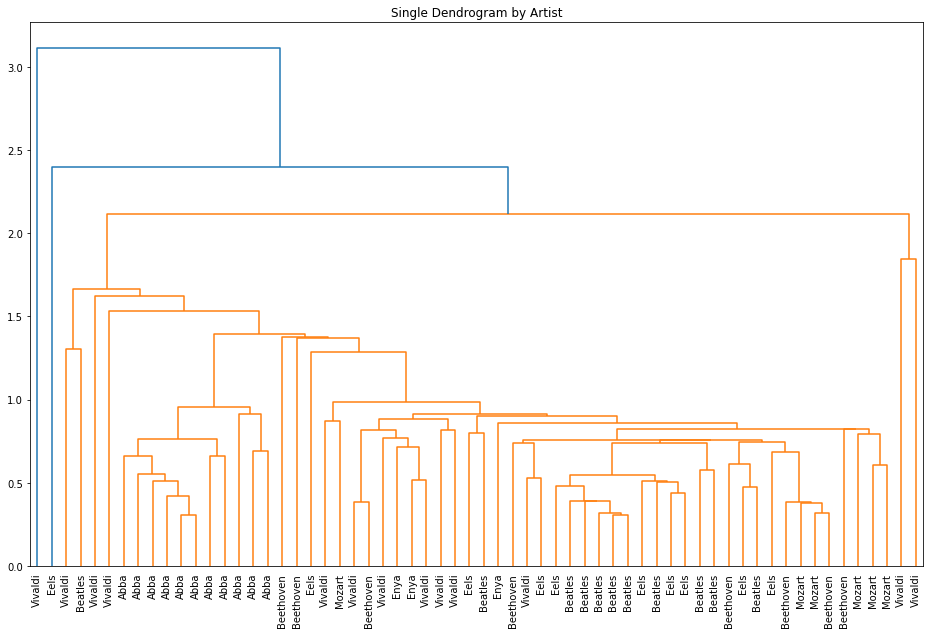

In [179]:
#set target index to "Type"
df=target.set_index('Artist')

#plot 1E dendrogram single linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Single Dendrogram by Artist")  
S2 = dendrogram(s_link,labels=df.index,leaf_font_size=10)

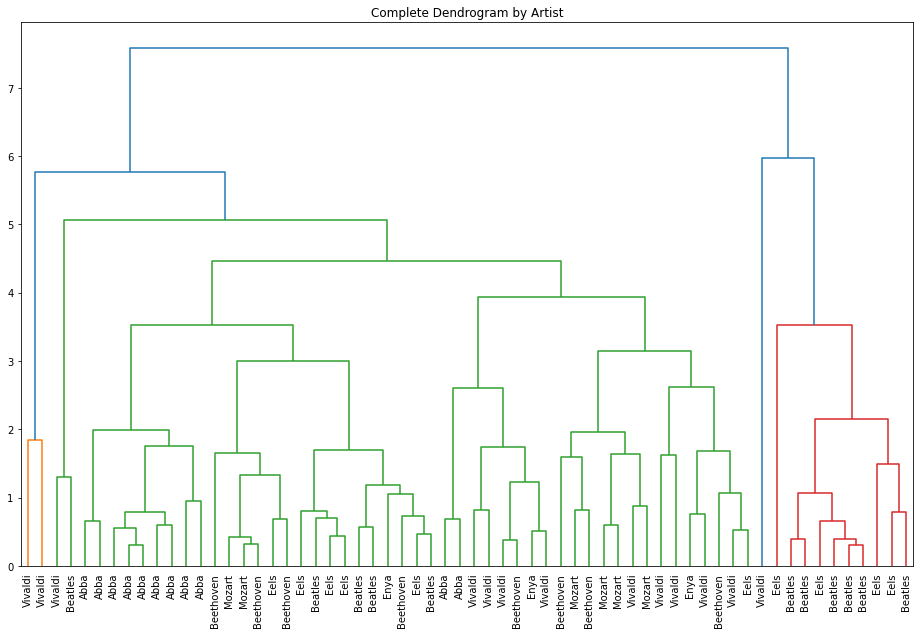

In [180]:
#plot 2E dendrogram complete linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Complete Dendrogram by Artist")  
C2 = dendrogram(c_link,labels=df.index,leaf_font_size=10)

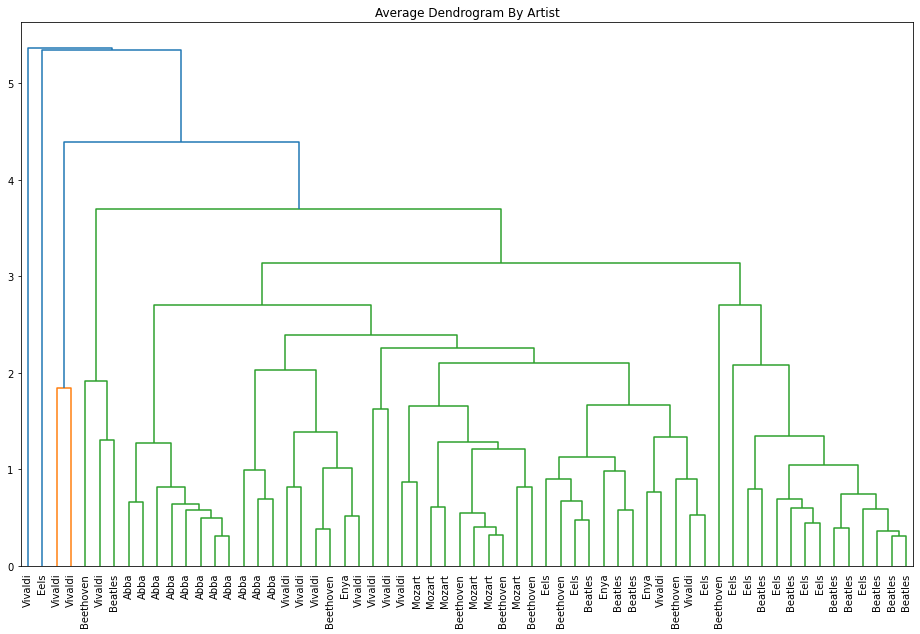

In [183]:
#plot 1E dendrogram average linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Average Dendrogram By Artist")  
A2 = dendrogram(a_link, labels=df.index, leaf_font_size=10)

#### Question 2F:
Which method seems best? Explain why.

The complete linkage method seems best. For both dendrograms labeld by "Type" and "Artist" it yielded four clusters.
Compared to the other two methods of linkage they yielded two to three clusters. I would say that a cluster of four would be more precise than a cluster of 2/3. 